# Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score

In [2]:
train = pd.read_csv('PJT002_train.csv', parse_dates=["dt_of_athrztn"])
val = pd.read_csv('PJT002_validation.csv', parse_dates=["dt_of_athrztn"])
test = pd.read_csv('PJT002_test.csv', parse_dates=["dt_of_athrztn"])
sub = pd.read_csv('PJT002_submission.csv')

C:\Users\ejvmw\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head()

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,no_tbc_zn_dstnc,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn
0,2017-10-20 05:54,Y,단독주택,블록구조,3,69.42,69.42,0.0,1977.0,1.0,...,88,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-30 08:26,N,NaN,NaN,3,46.29,46.29,0.0,nan,1.0,...,7727,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-10-30 14:57,Y,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,20001104.0,5.0,...,72,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-06-14 05:23,N,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1.0,...,508,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-22 05:38,N,NaN,NaN,2,0.00,0.00,0.0,nan,NaN,...,707,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(train.shape)
print(val.shape)
print(test.shape)
print(sub.shape)

(59199, 180)
(6898, 180)
(2957, 180)
(2957, 1)


In [5]:
train.columns.values

array(['dt_of_fr', 'fr_yn', 'bldng_us', 'bldng_archtctr', 'bldng_cnt',
       'bldng_ar', 'ttl_ar', 'lnd_ar', 'dt_of_athrztn', 'ttl_grnd_flr',
       'ttl_dwn_flr', 'bldng_us_clssfctn', 'tmprtr', 'prcpttn', 'wnd_spd',
       'wnd_drctn', 'hmdt', 'gas_engry_us_201401', 'ele_engry_us_201401',
       'gas_engry_us_201402', 'ele_engry_us_201402',
       'gas_engry_us_201403', 'ele_engry_us_201403',
       'gas_engry_us_201404', 'ele_engry_us_201404',
       'gas_engry_us_201405', 'ele_engry_us_201405',
       'gas_engry_us_201406', 'ele_engry_us_201406',
       'gas_engry_us_201407', 'ele_engry_us_201407',
       'gas_engry_us_201408', 'ele_engry_us_201408',
       'gas_engry_us_201409', 'ele_engry_us_201409',
       'gas_engry_us_201410', 'ele_engry_us_201410',
       'gas_engry_us_201411', 'ele_engry_us_201411',
       'gas_engry_us_201412', 'ele_engry_us_201412',
       'gas_engry_us_201501', 'ele_engry_us_201501',
       'gas_engry_us_201502', 'ele_engry_us_201502',
       'gas_engry_u

In [6]:
val.columns.values

array(['dt_of_fr', 'bldng_us', 'bldng_archtctr', 'bldng_cnt', 'bldng_ar',
       'ttl_ar', 'lnd_ar', 'dt_of_athrztn', 'ttl_grnd_flr', 'ttl_dwn_flr',
       'bldng_us_clssfctn', 'tmprtr', 'prcpttn', 'wnd_spd', 'wnd_drctn',
       'hmdt', 'gas_engry_us_201401', 'ele_engry_us_201401',
       'gas_engry_us_201402', 'ele_engry_us_201402',
       'gas_engry_us_201403', 'ele_engry_us_201403',
       'gas_engry_us_201404', 'ele_engry_us_201404',
       'gas_engry_us_201405', 'ele_engry_us_201405',
       'gas_engry_us_201406', 'ele_engry_us_201406',
       'gas_engry_us_201407', 'ele_engry_us_201407',
       'gas_engry_us_201408', 'ele_engry_us_201408',
       'gas_engry_us_201409', 'ele_engry_us_201409',
       'gas_engry_us_201410', 'ele_engry_us_201410',
       'gas_engry_us_201411', 'ele_engry_us_201411',
       'gas_engry_us_201412', 'ele_engry_us_201412',
       'gas_engry_us_201501', 'ele_engry_us_201501',
       'gas_engry_us_201502', 'ele_engry_us_201502',
       'gas_engry_us_201503'

In [7]:
list(train.columns.values).sort() == list(val.columns.values).sort()

True

In [8]:
train.isna().sum()

dt_of_fr                            0
fr_yn                               0
bldng_us                        27677
bldng_archtctr                  27665
bldng_cnt                           0
bldng_ar                            0
ttl_ar                              0
lnd_ar                              0
dt_of_athrztn                       0
ttl_grnd_flr                    10210
ttl_dwn_flr                     11005
bldng_us_clssfctn               29343
tmprtr                             13
prcpttn                         53629
wnd_spd                            33
wnd_drctn                         221
hmdt                               22
gas_engry_us_201401             27581
ele_engry_us_201401             27581
gas_engry_us_201402             27581
ele_engry_us_201402             27581
gas_engry_us_201403             27581
ele_engry_us_201403             27581
gas_engry_us_201404             27581
ele_engry_us_201404             27581
gas_engry_us_201405             27581
ele_engry_us

In [9]:
train.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59199 entries, 0 to 59198
Data columns (total 180 columns):
dt_of_fr                        object
fr_yn                           object
bldng_us                        object
bldng_archtctr                  object
bldng_cnt                       int64
bldng_ar                        float64
ttl_ar                          float64
lnd_ar                          float64
dt_of_athrztn                   object
ttl_grnd_flr                    float64
ttl_dwn_flr                     float64
bldng_us_clssfctn               object
tmprtr                          float64
prcpttn                         float64
wnd_spd                         float64
wnd_drctn                       float64
hmdt                            float64
gas_engry_us_201401             float64
ele_engry_us_201401             float64
gas_engry_us_201402             float64
ele_engry_us_201402             float64
gas_engry_us_201403             float64
ele_engry_us_20140

In [10]:
binary_y = {'N': 0, 'Y': 1}

train['fr_yn'] = train['fr_yn'].map(binary_y)
val['fr_yn'] = val['fr_yn'].map(binary_y)

# Preprocessing

## Part 1

### bldng_us 건물용도

In [11]:
train["bldng_us"].head()

0    단독주택
1     NaN
2    공동주택
3    단독주택
4     NaN
Name: bldng_us, dtype: object

In [12]:
train["bldng_us"].unique()

array(['단독주택', nan, '공동주택', '종교시설', '공장', '제1종근린생활시설', '숙박시설',
       '동.식물 관련시설', '창고시설', '제2종근린생활시설', '문화및집회시설', '자동차관련시설', '업무시설',
       '판매시설', '교육연구시설', '분뇨.쓰레기처리시설', '수련시설', '의료시설', '노유자시설', '운동시설',
       '위락시설', '위험물저장및처리시설', '공공용시설', '교정및군사시설', '교육연구및복지시설', '장례식장',
       '운수시설', '관광휴게시설', '근린생활시설', '시장', '방송통신시설', '묘지관련시설', '발전시설',
       '판매및영업시설', '파출소'], dtype=object)

In [13]:
test["bldng_us"].unique()

array([nan, '공장', '단독주택', '공동주택', '제1종근린생활시설', '의료시설', '제2종근린생활시설',
       '동.식물 관련시설', '위험물저장및처리시설', '창고시설', '교육연구시설', '노유자시설', '숙박시설',
       '문화및집회시설', '분뇨.쓰레기처리시설', '자동차관련시설', '업무시설', '근린생활시설', '위락시설',
       '종교시설', '판매시설', '관광휴게시설', '운동시설'], dtype=object)

In [14]:
train[train["bldng_us"].isnull()].shape

(27677, 180)

In [15]:
test[test["bldng_us"].isnull()].shape

(469, 180)

In [16]:
pd.value_counts(train["bldng_us"].values.flatten())

단독주택          20232
제1종근린생활시설      2350
제2종근린생활시설      2262
창고시설           1513
동.식물 관련시설      1467
공장             1179
공동주택            941
숙박시설            262
노유자시설           205
교육연구시설          185
종교시설            161
업무시설            131
자동차관련시설         119
위험물저장및처리시설      115
분뇨.쓰레기처리시설       55
판매시설             52
운동시설             42
문화및집회시설          38
위락시설             35
근린생활시설           31
관광휴게시설           30
의료시설             27
교육연구및복지시설        18
수련시설             15
운수시설             12
발전시설             11
방송통신시설           11
묘지관련시설            9
교정및군사시설           7
장례식장              3
판매및영업시설           1
시장                1
공공용시설             1
파출소               1
dtype: int64

In [17]:
pd.value_counts(test["bldng_us"].values.flatten())

단독주택          1150
공장             421
제2종근린생활시설      285
제1종근린생활시설      181
공동주택           176
동.식물 관련시설       76
창고시설            58
자동차관련시설         23
위험물저장및처리시설      18
교육연구시설          17
노유자시설           16
숙박시설            15
분뇨.쓰레기처리시설      10
위락시설             9
업무시설             9
종교시설             8
판매시설             5
운동시설             4
의료시설             3
관광휴게시설           2
문화및집회시설          1
근린생활시설           1
dtype: int64

In [18]:
pd.pivot_table(train, index="bldng_us", values="fr_yn")

,fr_yn
bldng_us,
공공용시설,0.000000
공동주택,0.619554
공장,0.553011
관광휴게시설,0.700000
교육연구및복지시설,0.333333
교육연구시설,0.508108
교정및군사시설,0.428571
근린생활시설,0.258065
노유자시설,0.248780


In [19]:
pd.value_counts(train[train["bldng_us"]=='단독주택']["bldng_archtctr"].values.flatten())

벽돌구조           6362
일반목구조          6325
블록구조           3107
철근콘크리트구조       2383
경량철골구조         1302
조적구조            359
일반철골구조          136
기타조적구조          120
석구조              41
기타구조             22
강파이프구조           17
기타강구조            15
목구조              14
통나무구조             9
철골콘크리트구조          7
프리케스트콘크리트구조       5
기타콘크리트구조          1
dtype: int64

In [20]:
#bldng_us_columns = set(train["bldng_us"].unique()).intersection(set(test["bldng_us"].unique())).intersection(set(val["bldng_us"].unique()))

In [21]:
#bldng_us_columns = list(train["bldng_us"].unique())

#for b in bldng_us_columns:
#    if (train["bldng_us"].values == b).sum() < 150:
#        train.loc[train["bldng_us"].values == b, "bldng_us"] = None
#        val.loc[val["bldng_us"].values == b, "bldng_us"] = None
#        test.loc[test["bldng_us"].values == b, "bldng_us"] = None

In [22]:
train["bldng_us"].value_counts()

단독주택          20232
제1종근린생활시설      2350
제2종근린생활시설      2262
창고시설           1513
동.식물 관련시설      1467
공장             1179
공동주택            941
숙박시설            262
노유자시설           205
교육연구시설          185
종교시설            161
업무시설            131
자동차관련시설         119
위험물저장및처리시설      115
분뇨.쓰레기처리시설       55
판매시설             52
운동시설             42
문화및집회시설          38
위락시설             35
근린생활시설           31
관광휴게시설           30
의료시설             27
교육연구및복지시설        18
수련시설             15
운수시설             12
발전시설             11
방송통신시설           11
묘지관련시설            9
교정및군사시설           7
장례식장              3
판매및영업시설           1
시장                1
공공용시설             1
파출소               1
Name: bldng_us, dtype: int64

In [23]:
pd.pivot_table(train, index="bldng_us", values="fr_yn")

,fr_yn
bldng_us,
공공용시설,0.000000
공동주택,0.619554
공장,0.553011
관광휴게시설,0.700000
교육연구및복지시설,0.333333
교육연구시설,0.508108
교정및군사시설,0.428571
근린생활시설,0.258065
노유자시설,0.248780


In [24]:
# 근린생활시설은 1종,2종 간 용도 차이가 너무 커 제외한다. (val로 검증 완료)

train.loc[train["bldng_us"].values == "제1종근린생활시설", "bldng_us"] = None
train.loc[train["bldng_us"].values == "제2종근린생활시설", "bldng_us"] = None


val.loc[val["bldng_us"].values == "제1종근린생활시설", "bldng_us"] = None
val.loc[val["bldng_us"].values == "제2종근린생활시설", "bldng_us"] = None


test.loc[test["bldng_us"].values == "제1종근린생활시설", "bldng_us"] = None
test.loc[test["bldng_us"].values == "제2종근린생활시설", "bldng_us"] = None


In [25]:
one_hot_bldng_us = pd.get_dummies(train["bldng_us"])
train = train.join(one_hot_bldng_us)

one_hot_bldng_us = pd.get_dummies(val["bldng_us"])
val = val.join(one_hot_bldng_us)

one_hot_bldng_us = pd.get_dummies(test["bldng_us"])
test = test.join(one_hot_bldng_us)

In [26]:
#원랜해야하는데 하니까 점수 더 내려감..
#train = train.drop("bldng_us", 1)
#val = val.drop("bldng_us", 1)
#test = test.drop("bldng_us", 1)

In [27]:
train.columns.values

array(['dt_of_fr', 'fr_yn', 'bldng_us', 'bldng_archtctr', 'bldng_cnt',
       'bldng_ar', 'ttl_ar', 'lnd_ar', 'dt_of_athrztn', 'ttl_grnd_flr',
       'ttl_dwn_flr', 'bldng_us_clssfctn', 'tmprtr', 'prcpttn', 'wnd_spd',
       'wnd_drctn', 'hmdt', 'gas_engry_us_201401', 'ele_engry_us_201401',
       'gas_engry_us_201402', 'ele_engry_us_201402',
       'gas_engry_us_201403', 'ele_engry_us_201403',
       'gas_engry_us_201404', 'ele_engry_us_201404',
       'gas_engry_us_201405', 'ele_engry_us_201405',
       'gas_engry_us_201406', 'ele_engry_us_201406',
       'gas_engry_us_201407', 'ele_engry_us_201407',
       'gas_engry_us_201408', 'ele_engry_us_201408',
       'gas_engry_us_201409', 'ele_engry_us_201409',
       'gas_engry_us_201410', 'ele_engry_us_201410',
       'gas_engry_us_201411', 'ele_engry_us_201411',
       'gas_engry_us_201412', 'ele_engry_us_201412',
       'gas_engry_us_201501', 'ele_engry_us_201501',
       'gas_engry_us_201502', 'ele_engry_us_201502',
       'gas_engry_u

In [28]:
list(train.columns.values).sort() == list(val.columns.values).sort()

True

In [29]:
for a in train.columns.values:
    if a not in list(test.columns.values):
        print(a)

공공용시설
교육연구및복지시설
교정및군사시설
묘지관련시설
발전시설
방송통신시설
수련시설
시장
운수시설
장례식장
파출소
판매및영업시설


### bldng_archtctr 건물구조

In [30]:
train["bldng_archtctr"].head()

0        블록구조
1         NaN
2    철근콘크리트구조
3       일반목구조
4         NaN
Name: bldng_archtctr, dtype: object

In [31]:
train["bldng_archtctr"].unique()

array(['블록구조', nan, '철근콘크리트구조', '일반목구조', '벽돌구조', '경량철골구조', '일반철골구조',
       '철골콘크리트구조', '통나무구조', '강파이프구조', '목구조', '석구조', '조적구조', '기타강구조',
       '철골철근콘크리트구조', '기타구조', '기타조적구조', '프리케스트콘크리트구조', '기타콘크리트구조'],
      dtype=object)

In [32]:
test["bldng_archtctr"].unique()

array([nan, '일반철골구조', '철근콘크리트구조', '일반목구조', '벽돌구조', '경량철골구조', '철골철근콘크리트구조',
       '블록구조', '기타조적구조', '철골콘크리트구조', '기타콘크리트구조', '기타강구조', '조적구조',
       '강파이프구조', '목구조', '기타구조', '석구조'], dtype=object)

In [33]:
for i in train["bldng_archtctr"].unique():
    if i not in test["bldng_archtctr"].unique():
        print(i)

nan
통나무구조
프리케스트콘크리트구조


In [34]:
for i in train["bldng_archtctr"].unique():
    if i not in val["bldng_archtctr"].unique():
        print(i)

nan
프리케스트콘크리트구조


In [35]:
print(train[train["bldng_archtctr"].isnull()].shape)
print(val[val["bldng_archtctr"].isnull()].shape)
print(test[test["bldng_archtctr"].isnull()].shape)

(27665, 212)
(1099, 203)
(460, 200)


In [36]:
pd.value_counts(train["bldng_archtctr"].values.flatten())

벽돌구조           7377
일반목구조          6852
철근콘크리트구조       6694
블록구조           4087
경량철골구조         3378
일반철골구조         1938
조적구조            398
강파이프구조          395
기타조적구조          176
석구조              55
철골철근콘크리트구조       43
기타강구조            36
철골콘크리트구조         35
기타구조             27
목구조              17
프리케스트콘크리트구조      14
통나무구조            11
기타콘크리트구조          1
dtype: int64

In [37]:
pd.pivot_table(train, index="bldng_archtctr", values="fr_yn")

,fr_yn
bldng_archtctr,
강파이프구조,0.253165
경량철골구조,0.290112
기타강구조,0.305556
기타구조,0.259259
기타조적구조,0.261364
기타콘크리트구조,0.000000
목구조,0.117647
벽돌구조,0.150061
블록구조,0.183998


In [38]:
A = ["목구조", "일반목구조", "벽돌구조", "블록구조", "석구조", "조적구조"]
B = ["강파이프구조", "경량철골구조", "기타강구조", "기타구조", "기타조적구조"]
C = ["일반철골구조", "철골철근콘크리트구조", "철골콘크리트구조", "철근콘크리트구조"]

for i in A:
    train.loc[train["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "A"

for i in B:
    train.loc[train["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "B"
    
for i in C:
    train.loc[train["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "C"

    
for i in A:
    val.loc[val["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "A"

for i in B:
    val.loc[val["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "B"
    
for i in C:
    val.loc[val["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "C"


for i in A:
    test.loc[test["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "A"

for i in B:
    test.loc[test["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "B"
    
for i in C:
    test.loc[test["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "C"

















In [39]:
pd.pivot_table(train, index="bldng_archtctr_encoded", values="fr_yn")

,fr_yn
bldng_archtctr_encoded,
A,0.169701
B,0.285145
C,0.378416


In [40]:
#bldng_archtctr_columns = list(train["bldng_archtctr"].unique())

#for b in bldng_archtctr_columns:
#    if (train["bldng_archtctr"].values == b).sum() < 150:
#        train.loc[train["bldng_archtctr"].values == b, "bldng_archtctr"] = None
#        val.loc[val["bldng_archtctr"].values == b, "bldng_archtctr"] = None
#        test.loc[test["bldng_us"].values == b, "bldng_archtctr"] = None

In [41]:
one_hot_bldng_archtctr = pd.get_dummies(train["bldng_archtctr_encoded"])
train = train.join(one_hot_bldng_archtctr)

one_hot_bldng_archtctr = pd.get_dummies(val["bldng_archtctr_encoded"])
val = val.join(one_hot_bldng_archtctr)

one_hot_bldng_archtctr = pd.get_dummies(test["bldng_archtctr_encoded"])
test = test.join(one_hot_bldng_archtctr)


In [42]:
train = train.drop("bldng_archtctr", 1)
val = val.drop("bldng_archtctr", 1)
test = test.drop("bldng_archtctr", 1)

train = train.drop("bldng_archtctr_encoded", 1)
val = val.drop("bldng_archtctr_encoded", 1)
test = test.drop("bldng_archtctr_encoded", 1)

### bldng_cnt 건물채수

In [43]:
train["bldng_cnt"].head()

0    3
1    3
2    1
3    2
4    2
Name: bldng_cnt, dtype: int64

In [44]:
train["bldng_cnt"].value_counts()

1      19232
2      12712
3       9352
4       6201
5       3855
6       2466
7       1462
8        918
9        586
10       399
11       286
12       265
13       176
15       154
14       147
17       103
16        97
18        91
20        60
19        54
21        53
22        46
23        43
28        29
24        27
31        24
27        23
30        23
26        22
25        20
       ...  
69         2
65         2
114        2
705        1
93         1
85         1
156        1
122        1
99         1
125        1
94         1
117        1
132        1
139        1
75         1
133        1
148        1
115        1
83         1
210        1
71         1
167        1
113        1
111        1
79         1
174        1
138        1
110        1
77         1
223        1
Name: bldng_cnt, Length: 96, dtype: int64

In [45]:
train["bldng_cnt"].describe()

count    59199.000000
mean         3.453927
std          7.220839
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        705.000000
Name: bldng_cnt, dtype: float64

In [46]:
bldng_cnt_under10 = train[train["bldng_cnt"]<10] 
bldng_cnt_under10["bldng_cnt"].describe()

count    56784.000000
mean         2.719763
std          1.859939
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          9.000000
Name: bldng_cnt, dtype: float64

In [47]:
bldng_cnt_under10["fr_yn"].describe()

count    56784.000000
mean         0.124225
std          0.329841
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: fr_yn, dtype: float64

(array([19232., 12712.,  9352.,  6201.,     0.,  3855.,  2466.,  1462.,
          918.,   586.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

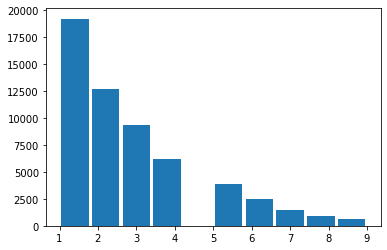

In [48]:
plt.hist(bldng_cnt_under10["bldng_cnt"], rwidth=0.9)

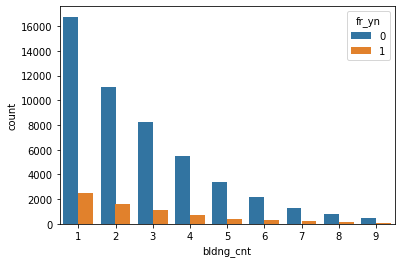

In [49]:
sns.countplot(data=bldng_cnt_under10, x="bldng_cnt",hue="fr_yn")

In [50]:
pd.pivot_table(bldng_cnt_under10, index="bldng_cnt", values="fr_yn")

,fr_yn
bldng_cnt,
1,0.128276
2,0.129405
3,0.117622
4,0.109660
5,0.112581
6,0.118816
7,0.137483
8,0.151416
9,0.162116


In [51]:
bldng_cnt_under20 = train[train["bldng_cnt"]<20]
bldng_cnt_under20["bldng_cnt"].describe()

count    58556.000000
mean         3.029203
std          2.576160
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         19.000000
Name: bldng_cnt, dtype: float64

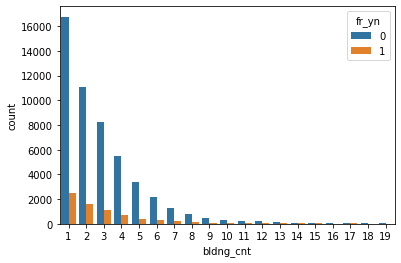

In [52]:
sns.countplot(data=bldng_cnt_under20, x="bldng_cnt",hue="fr_yn")

In [53]:
pd.pivot_table(bldng_cnt_under20, index="bldng_cnt", values="fr_yn")

,fr_yn
bldng_cnt,
1,0.128276
2,0.129405
3,0.117622
4,0.109660
5,0.112581
6,0.118816
7,0.137483
8,0.151416
9,0.162116


In [54]:
bldng_cnt_under50 = train[train["bldng_cnt"]<50]
bldng_cnt_under50["bldng_cnt"].describe()

count    59085.000000
mean         3.254041
std          3.559163
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         49.000000
Name: bldng_cnt, dtype: float64

In [55]:
pd.pivot_table(bldng_cnt_under50, index="bldng_cnt", values="fr_yn")

,fr_yn
bldng_cnt,
1,0.128276
2,0.129405
3,0.117622
4,0.109660
5,0.112581
6,0.118816
7,0.137483
8,0.151416
9,0.162116


In [56]:
bldng_cnt_over50_under250 = train[(train["bldng_cnt"]>50)&(train["bldng_cnt"]<250)]
bldng_cnt_over50_under250["bldng_cnt"].describe()

count     93.000000
mean      78.311828
std       35.779512
min       51.000000
25%       59.000000
50%       63.000000
75%       83.000000
max      223.000000
Name: bldng_cnt, dtype: float64

In [57]:
bldng_cnt_over50_under250["fr_yn"].describe()

count    93.000000
mean      0.247312
std       0.433788
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: fr_yn, dtype: float64

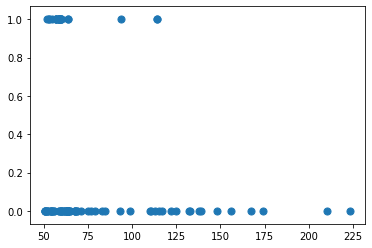

In [58]:
plt.scatter(bldng_cnt_over50_under250["bldng_cnt"], bldng_cnt_over50_under250["fr_yn"], s=50)

In [59]:
bldng_cnt_over50_under75 = train[(train["bldng_cnt"]>50)&(train["bldng_cnt"]<75)]
bldng_cnt_over50_under75["fr_yn"].describe()

count    66.00000
mean      0.30303
std       0.46309
min       0.00000
25%       0.00000
50%       0.00000
75%       1.00000
max       1.00000
Name: fr_yn, dtype: float64

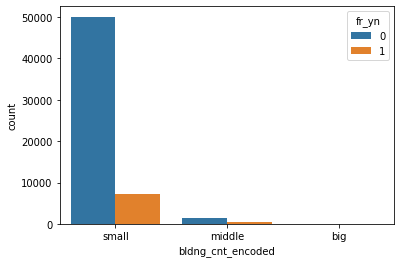

In [60]:
train.loc[train["bldng_cnt"]<11, "bldng_cnt_encoded"] = "small"
train.loc[(train["bldng_cnt"]>10)&(train["bldng_cnt"]<75), "bldng_cnt_encoded"] = "middle"
train.loc[train["bldng_cnt"]>74, "bldng_cnt_encoded"] = "big"

sns.countplot(data=train, x="bldng_cnt_encoded",hue="fr_yn")



In [61]:
one_hot_bldng_cnt_encoded = pd.get_dummies(train["bldng_cnt_encoded"])
train = train.join(one_hot_bldng_cnt_encoded)

In [62]:
val.loc[val["bldng_cnt"]<11, "bldng_cnt_encoded"] = "small"
val.loc[(val["bldng_cnt"]>10)&(val["bldng_cnt"]<75), "bldng_cnt_encoded"] = "middle"
val.loc[val["bldng_cnt"]>74, "bldng_cnt_encoded"] = "big"

one_hot_bldng_cnt_encoded = pd.get_dummies(val["bldng_cnt_encoded"])
val = val.join(one_hot_bldng_cnt_encoded)

In [63]:
test.loc[val["bldng_cnt"]<11, "bldng_cnt_encoded"] = "small"
test.loc[(test["bldng_cnt"]>10)&(test["bldng_cnt"]<75), "bldng_cnt_encoded"] = "middle"
test.loc[test["bldng_cnt"]>74, "bldng_cnt_encoded"] = "big"

one_hot_bldng_cnt_encoded = pd.get_dummies(test["bldng_cnt_encoded"])
test = test.join(one_hot_bldng_cnt_encoded)

In [64]:
train = train.drop("bldng_cnt", 1)
val = val.drop("bldng_cnt", 1)
test = test.drop("bldng_cnt", 1)

train = train.drop("bldng_cnt_encoded", 1)
val = val.drop("bldng_cnt_encoded", 1)
test = test.drop("bldng_cnt_encoded", 1)

### bldng_ar & ttl_ar & lnd_ar 건물건축면적, 건물연면적, 토지면적

In [65]:
# val 값이 전처리 하기 전이 조금 더 잘나옴

In [66]:
train["bldng_ar"].head(10)

0     69.42
1     46.29
2    583.80
3     48.92
4      0.00
5     96.66
6     84.00
7     92.00
8    102.36
9     66.13
Name: bldng_ar, dtype: float64

In [67]:
print(train[train["bldng_ar"].isnull()].shape)
print(val[val["bldng_ar"].isnull()].shape)
print(test[test["bldng_ar"].isnull()].shape)

(0, 216)
(0, 206)
(0, 204)


In [68]:
print(train[train["bldng_ar"]==0].shape)
print(val[val["bldng_ar"]==0].shape)
print(test[test["bldng_ar"]==0].shape)

(9660, 216)
(230, 206)
(98, 204)


In [69]:
print(train[train["ttl_ar"]==0].shape)
print(val[val["ttl_ar"]==0].shape)
print(test[test["ttl_ar"]==0].shape)

(8426, 216)
(211, 206)
(88, 204)


In [70]:
print(train[train["lnd_ar"]==0].shape)
print(val[val["lnd_ar"]==0].shape)
print(test[test["lnd_ar"]==0].shape)

(25569, 216)
(1259, 206)
(554, 204)


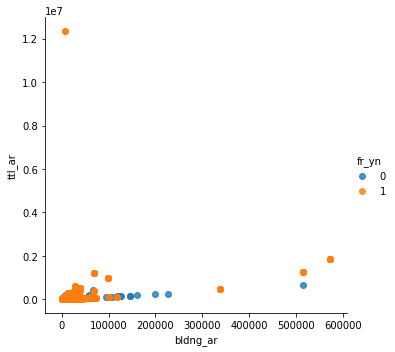

In [71]:
bldng_ar_notnull = train[train["bldng_ar"]!=0]
sns.lmplot(data=bldng_ar_notnull, x="bldng_ar", y="ttl_ar", hue="fr_yn", fit_reg=False)

In [72]:
low_bldng_ar = train[(train["bldng_ar"]<4000)&(train["bldng_ar"]>0)&(train["ttl_ar"]<3000)&(train["ttl_ar"]>0)]
low_bldng_ar.shape

(47191, 216)

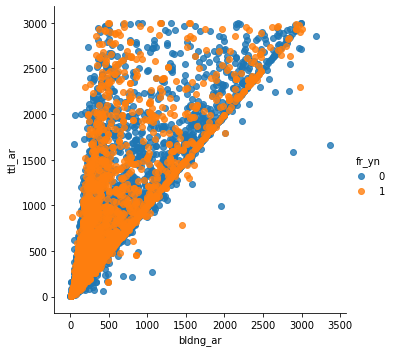

In [73]:
sns.lmplot(data=low_bldng_ar, x="bldng_ar", y="ttl_ar", hue="fr_yn", fit_reg=False)

In [74]:
low_bldng_ar = train[(train["bldng_ar"]<4000)&(train["bldng_ar"]>0)
                     &(train["ttl_ar"]<3000)&(train["ttl_ar"]>0)
                     &(train["lnd_ar"]<4000)&(train["lnd_ar"]>0)]

C:\Users\ejvmw\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


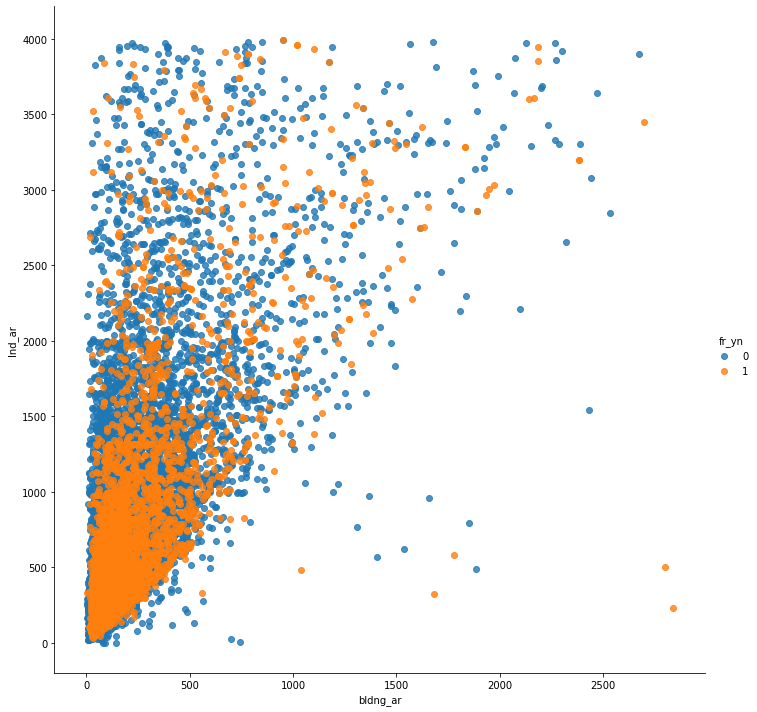

In [75]:
sns.lmplot(data=low_bldng_ar, x="bldng_ar", y="lnd_ar", hue="fr_yn", fit_reg=False, size=10)

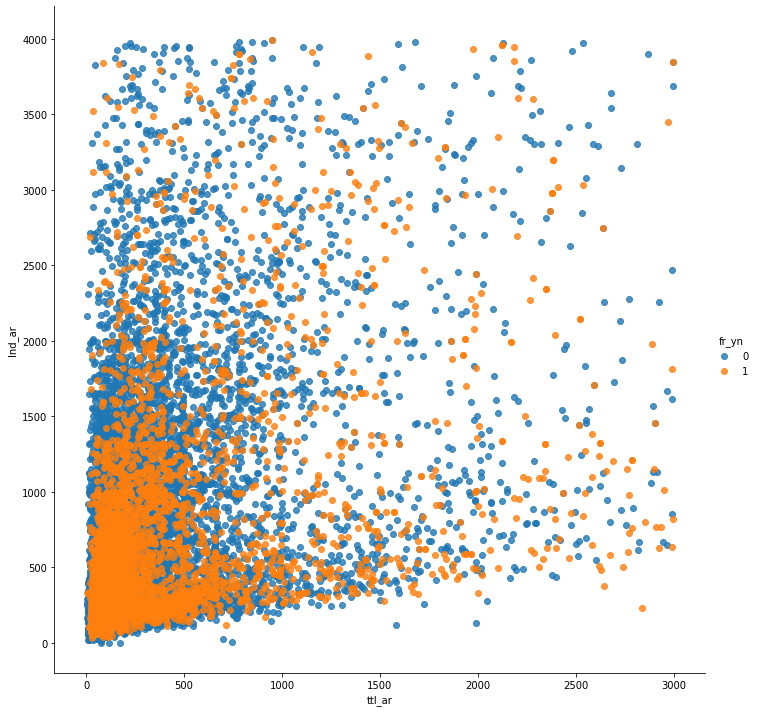

In [76]:
sns.lmplot(data=low_bldng_ar, x="ttl_ar", y="lnd_ar", hue="fr_yn", fit_reg=False, size=10)

In [77]:
low_low_bldng_ar = train[(train["bldng_ar"]<1500)&(train["bldng_ar"]>0)
                     &(train["ttl_ar"]<2000)&(train["ttl_ar"]>0)
                     &(train["lnd_ar"]<2000)&(train["lnd_ar"]>0)]
low_low_bldng_ar.shape

(29339, 216)

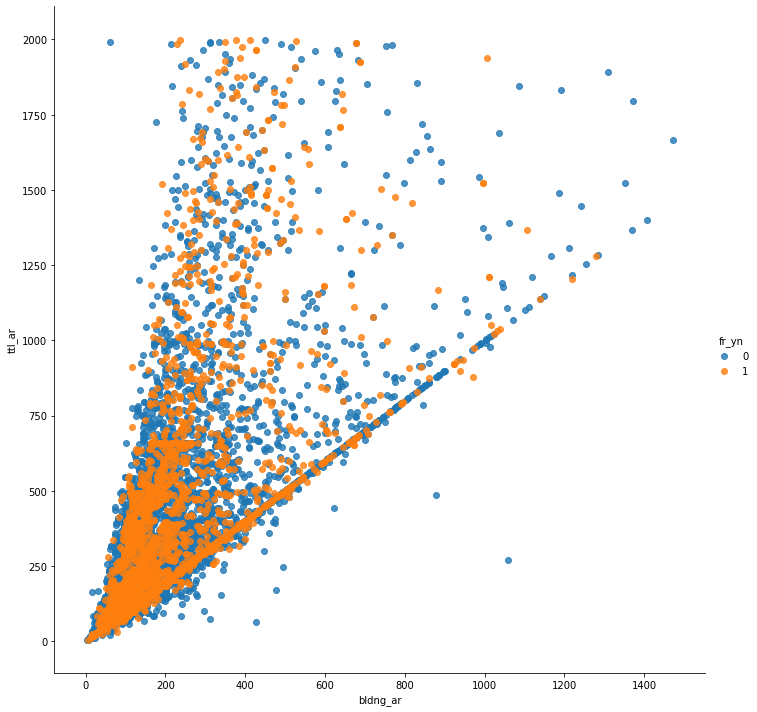

In [78]:
sns.lmplot(data=low_low_bldng_ar, x="bldng_ar", y="ttl_ar", hue="fr_yn", fit_reg=False, size=10)

In [79]:
train[train["bldng_ar"]==0].shape

(9660, 216)

In [80]:
train["bldng_ar"].describe()

count     59199.000000
mean        633.562740
std        9211.774472
min           0.000000
25%          46.280000
50%          87.730000
75%         155.100000
max      572897.955000
Name: bldng_ar, dtype: float64

In [81]:
train["ttl_ar"].mean()

2477.958209555566

In [82]:
train["ttl_ar"].median()

97.2

In [83]:
train.loc[train["bldng_ar"]==0, "bldng_ar"] = train["bldng_ar"].median()
train.loc[train["ttl_ar"]==0, "ttl_ar"] = train["ttl_ar"].median()

val.loc[val["bldng_ar"]==0, "bldng_ar"] = val["bldng_ar"].median()
val.loc[val["ttl_ar"]==0, "ttl_ar"] = val["ttl_ar"].median()

test.loc[test["bldng_ar"]==0, "bldng_ar"] = test["bldng_ar"].median()
test.loc[test["ttl_ar"]==0, "ttl_ar"] = test["ttl_ar"].median()


In [84]:
#train["floors"] = train["ttl_ar"] / train["bldng_ar"]
#train["floors"].head()

In [85]:
train = train.drop("lnd_ar", 1)
val = val.drop("lnd_ar", 1)
test = test.drop("lnd_ar", 1)

### dt_of_athrztn 건물승인날짜

In [86]:
train["dt_of_athrztn"].head()

0        1977.0
1           nan
2    20001104.0
3          1936
4           nan
Name: dt_of_athrztn, dtype: object

In [87]:
train["year_athrztn"] = train["dt_of_athrztn"].str[:4]
val["year_athrztn"] = val["dt_of_athrztn"].str[:4]
test["year_athrztn"]=test["dt_of_athrztn"].str[:4]

In [88]:
year_athrztn_notnull = train[(train["year_athrztn"]!="nan")]
year_athrztn_YYYY = year_athrztn_notnull[year_athrztn_notnull["year_athrztn"].astype(int)<3000]
year_athrztn_YY = year_athrztn_notnull[year_athrztn_notnull["year_athrztn"].astype(int)>3000]
year_athrztn_null = train[train["year_athrztn"]=="nan"]

In [89]:
print(year_athrztn_YYYY.shape)
print(year_athrztn_YY.shape)
print(year_athrztn_null.shape)

(31612, 216)
(6, 216)
(27581, 216)


In [90]:
year_athrztn_YYYY["year_athrztn"].head()

0    1977
2    2000
3    1936
5    2015
7    1994
Name: year_athrztn, dtype: object

In [91]:
year_athrztn_YY["year_athrztn"].head()

12642    9800
21218    9900
26351    9990
30954    9820
38448    9780
Name: year_athrztn, dtype: object

In [92]:
year_athrztn_YY["year_athrztn"] = 1900 + year_athrztn_YY["dt_of_athrztn"].str[:2].astype(int)

C:\Users\ejvmw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
year_athrztn_notnull = year_athrztn_YYYY.append(year_athrztn_YY)
year_athrztn_median=year_athrztn_notnull["year_athrztn"].median()
year_athrztn_median

1993.0

In [94]:
year_athrztn_null["year_athrztn"]=year_athrztn_median

C:\Users\ejvmw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
train = year_athrztn_notnull.append(year_athrztn_null)
train.shape

(59199, 216)

In [96]:
val.loc[val["year_athrztn"]=="nan","year_athrztn"]= val[val["year_athrztn"]!="nan"]["year_athrztn"].median()
test.loc[test["year_athrztn"]=="nan","year_athrztn"]= test[test["year_athrztn"]!="nan"]["year_athrztn"].median()

In [97]:
train["year_athrztn"] = train["year_athrztn"].astype(int)
val["year_athrztn"] = val["year_athrztn"].astype(int)
test["year_athrztn"] = test["year_athrztn"].astype(int)


In [98]:
train.reset_index(inplace=True)
train.drop('index',inplace=True,axis=1)

In [99]:

train.loc[train["year_athrztn"]<2000,"year_athrztn_encoded"] = "old"
train.loc[train["year_athrztn"]>1999,"year_athrztn_encoded"] = "new"

val.loc[val["year_athrztn"]<2000,"year_athrztn_encoded"] = "old"
val.loc[val["year_athrztn"]>1999,"year_athrztn_encoded"] = "new"

test.loc[test["year_athrztn"]<2000,"year_athrztn_encoded"] = "old"
test.loc[test["year_athrztn"]>1999,"year_athrztn_encoded"] = "new"

In [100]:
pd.pivot_table(train, index="year_athrztn_encoded", values="fr_yn")

,fr_yn
year_athrztn_encoded,
new,0.300941
old,0.093631


In [101]:
train = train.drop("dt_of_athrztn", 1)
val = val.drop("dt_of_athrztn", 1)
test = test.drop("dt_of_athrztn", 1)

## part 3

### ele_energy_us_YYYYMM 전기 에너지 사용량 (YYYY년 M월)

## part5

### trgt_cnt 소방점검대상물기준

In [102]:
train[train["trgt_crtr"].notnull()].shape

(8177, 216)

In [103]:
pd.value_counts(train["trgt_crtr"].values.flatten())

일반대상물                        7589
민박7실이하                        294
자동화재탐지설치대상                    146
옥내소화전설치대상                      69
스프링클러,물분무등설치대상                 28
민박7실이상                         16
펜션7실이하                         12
공동주택(주택법시행령제63조제1항각호1에해당)       6
연면적 15,000 이상                   6
펜션7실이상                          2
11층이상                           2
기타(가설건축물분류)                     2
견본주택(모델하우스)                     1
기타                              1
콘테이너하우스                         1
주거용비닐하우스                        1
임시사무실,창고,숙소                     1
dtype: int64

In [104]:
pd.pivot_table(train, index="trgt_crtr", values="fr_yn")

,fr_yn
trgt_crtr,
11층이상,0.500000
견본주택(모델하우스),0.000000
공동주택(주택법시행령제63조제1항각호1에해당),0.833333
기타,1.000000
기타(가설건축물분류),0.000000
민박7실이상,0.062500
민박7실이하,0.187075
"스프링클러,물분무등설치대상",0.500000
"연면적 15,000 이상",0.333333


In [105]:
pd.value_counts(test["trgt_crtr"].values.flatten())

일반대상물             192
자동화재탐지설치대상         18
옥내소화전설치대상          15
스프링클러,물분무등설치대상      7
민박7실이하              1
dtype: int64

In [106]:
pd.value_counts(val["trgt_crtr"].values.flatten())

일반대상물             430
자동화재탐지설치대상         34
스프링클러,물분무등설치대상     18
옥내소화전설치대상          16
민박7실이하              4
펜션7실이상              1
민박7실이상              1
dtype: int64

In [107]:
pd.value_counts(test["trgt_crtr"].values.flatten())

일반대상물             192
자동화재탐지설치대상         18
옥내소화전설치대상          15
스프링클러,물분무등설치대상      7
민박7실이하              1
dtype: int64

In [108]:
train.loc[train["trgt_crtr"]=="자동화재탐지설치대상", "auto_fr"] = 1
train.loc[train["trgt_crtr"]!="자동화재탐지설치대상", "auto_fr"] = 0
train.loc[train["trgt_crtr"]=="옥내소화전설치대상", "fireplug"] = 1
train.loc[train["trgt_crtr"]!="옥내소화전설치대상", "fireplug"] = 0
train.loc[train["trgt_crtr"]=="스프링클러,물분무등설치대상", "sprinkler"] = 1
train.loc[train["trgt_crtr"]!="스프링클러,물분무등설치대상", "sprinkler"] = 0


val.loc[val["trgt_crtr"]=="자동화재탐지설치대상", "auto_fr"] = 1
val.loc[val["trgt_crtr"]!="자동화재탐지설치대상", "auto_fr"] = 0
val.loc[val["trgt_crtr"]=="옥내소화전설치대상", "fireplug"] = 1
val.loc[val["trgt_crtr"]!="옥내소화전설치대상", "fireplug"] = 0
val.loc[val["trgt_crtr"]=="스프링클러,물분무등설치대상", "sprinkler"] = 1
val.loc[val["trgt_crtr"]!="스프링클러,물분무등설치대상", "sprinkler"] = 0

test.loc[test["trgt_crtr"]=="자동화재탐지설치대상", "auto_fr"] = 1
test.loc[test["trgt_crtr"]!="자동화재탐지설치대상", "auto_fr"] = 0
test.loc[test["trgt_crtr"]=="옥내소화전설치대상", "fireplug"] = 1
test.loc[test["trgt_crtr"]!="옥내소화전설치대상", "fireplug"] = 0
test.loc[test["trgt_crtr"]=="스프링클러,물분무등설치대상", "sprinkler"] = 1
test.loc[test["trgt_crtr"]!="스프링클러,물분무등설치대상", "sprinkler"] = 0

In [109]:
train = train.drop("trgt_crtr", 1)
val = val.drop("trgt_crtr", 1)
test = test.drop("trgt_crtr", 1)

### fr_fghtng_fclt_spcl_css_5_yn & fr_fghtng_fclt_spcl_css_6_yn 소방시설특례 5,6호 여부

In [110]:
#공란, N, NA로 구성

In [111]:
train[train["fr_fghtng_fclt_spcl_css_5_yn"].isnull()].shape

(50762, 218)

In [112]:
train[train["fr_fghtng_fclt_spcl_css_5_yn"].notnull()].shape

(8437, 218)

In [113]:
train[train["fr_fghtng_fclt_spcl_css_5_yn"]=="N"].shape

(8437, 218)

In [114]:
test[test["fr_fghtng_fclt_spcl_css_5_yn"].isnull()].shape

(2400, 206)

In [115]:
test[test["fr_fghtng_fclt_spcl_css_5_yn"].notnull()].shape

(557, 206)

In [116]:
train.loc[train["fr_fghtng_fclt_spcl_css_5_yn"].isnull(),"css_5_yn_encoded"]=0
train.loc[train["fr_fghtng_fclt_spcl_css_5_yn"].notnull(),"css_5_yn_encoded"]=1

In [117]:
pd.pivot_table(train, index="css_5_yn_encoded", values="fr_yn")

,fr_yn
css_5_yn_encoded,
0.0,0.119184
1.0,0.190471


In [118]:
train.loc[train["fr_fghtng_fclt_spcl_css_6_yn"].isnull(),"css_6_yn_encoded"]=0
train.loc[train["fr_fghtng_fclt_spcl_css_6_yn"].notnull(),"css_6_yn_encoded"]=1


In [119]:
pd.pivot_table(train, index="css_6_yn_encoded", values="fr_yn")

,fr_yn
css_6_yn_encoded,
0.0,0.119184
1.0,0.190471


In [120]:
val.loc[train["fr_fghtng_fclt_spcl_css_6_yn"].isnull(),"css_6_yn_encoded"]=0
val.loc[train["fr_fghtng_fclt_spcl_css_6_yn"].notnull(),"css_6_yn_encoded"]=1

test.loc[train["fr_fghtng_fclt_spcl_css_6_yn"].isnull(),"css_6_yn_encoded"]=0
test.loc[train["fr_fghtng_fclt_spcl_css_6_yn"].notnull(),"css_6_yn_encoded"]=1

In [121]:
train = train.drop("fr_fghtng_fclt_spcl_css_5_yn", 1)
val = val.drop("fr_fghtng_fclt_spcl_css_5_yn", 1)
test = test.drop("fr_fghtng_fclt_spcl_css_5_yn", 1)

train = train.drop("fr_fghtng_fclt_spcl_css_6_yn", 1)
val = val.drop("fr_fghtng_fclt_spcl_css_6_yn", 1)
test = test.drop("fr_fghtng_fclt_spcl_css_6_yn", 1)

train = train.drop("css_5_yn_encoded", 1)



### us_yn 사용 여부

In [122]:
print(train[train["us_yn"].isnull()].shape)
print(train[train["us_yn"].notnull()].shape)
print(test[test["us_yn"].isnull()].shape)
print(test[test["us_yn"].notnull()].shape)

(49447, 217)
(9752, 217)
(2318, 205)
(639, 205)


In [123]:
pd.pivot_table(train, index="us_yn", values="fr_yn")

,fr_yn
us_yn,
N,0.225929
T,0.472693
Y,0.167046


In [124]:
pd.value_counts(train["us_yn"].values.flatten())

Y    7902
N    1319
T     531
dtype: int64

In [125]:
pd.value_counts(test["us_yn"].values.flatten())

Y    466
N    117
T     56
dtype: int64

In [126]:
one_hot_us_yn = pd.get_dummies(train["us_yn"])
train = train.join(one_hot_us_yn)

one_hot_us_yn = pd.get_dummies(val["us_yn"])
val = val.join(one_hot_us_yn)

one_hot_us_yn = pd.get_dummies(test["us_yn"])
test = test.join(one_hot_us_yn)

In [127]:
train = train.drop("us_yn", 1)
val = val.drop("us_yn", 1)
test = test.drop("us_yn", 1)

### dngrs_thng_yn 위험물대상여부

In [128]:
print(train[train["dngrs_thng_yn"].isnull()].shape)
print(train[train["dngrs_thng_yn"].notnull()].shape)
print(test[test["dngrs_thng_yn"].isnull()].shape)
print(test[test["dngrs_thng_yn"].notnull()].shape)

(49447, 219)
(9752, 219)
(2318, 207)
(639, 207)


In [129]:
pd.value_counts(train["dngrs_thng_yn"].values.flatten())

N    9746
Y       6
dtype: int64

In [130]:
pd.value_counts(test["dngrs_thng_yn"].values.flatten())

N    639
dtype: int64

In [131]:
pd.pivot_table(train, index="dngrs_thng_yn", values="fr_yn")

,fr_yn
dngrs_thng_yn,
N,0.191668
Y,0.166667


In [132]:
train.loc[train["dngrs_thng_yn"].isnull(),"dngrs_thng_yn_encoded"]= 0
train.loc[train["dngrs_thng_yn"].notnull(),"dngrs_thng_yn_encoded"]= 1


pd.pivot_table(train, index="dngrs_thng_yn_encoded", values="fr_yn")

,fr_yn
dngrs_thng_yn_encoded,
0.0,0.117055
1.0,0.191653


In [133]:
val.loc[train["dngrs_thng_yn"].isnull(),"dngrs_thng_yn_encoded"]= 0
val.loc[train["dngrs_thng_yn"].notnull(),"dngrs_thng_yn_encoded"]= 1

test.loc[train["dngrs_thng_yn"].isnull(),"dngrs_thng_yn_encoded"]= 0
test.loc[train["dngrs_thng_yn"].notnull(),"dngrs_thng_yn_encoded"]= 1

In [134]:
train = train.drop("dngrs_thng_yn", 1)
val = val.drop("dngrs_thng_yn", 1)
test = test.drop("dngrs_thng_yn", 1)

### slf_fr_brgd_yn 자체소방대여부

In [135]:
print(train[train["slf_fr_brgd_yn"].isnull()].shape)
print(train[train["slf_fr_brgd_yn"].notnull()].shape)
print(test[test["slf_fr_brgd_yn"].isnull()].shape)
print(test[test["slf_fr_brgd_yn"].notnull()].shape)

(49447, 219)
(9752, 219)
(2318, 207)
(639, 207)


In [136]:
pd.value_counts(train["slf_fr_brgd_yn"].values.flatten())

N    9752
dtype: int64

In [137]:
pd.value_counts(test["slf_fr_brgd_yn"].values.flatten())

N    639
dtype: int64

In [138]:
train.loc[train["slf_fr_brgd_yn"].isnull(),"slf_fr_brgd_yn"]=0

pd.pivot_table(train, index="slf_fr_brgd_yn", values="fr_yn")

,fr_yn
slf_fr_brgd_yn,
0,0.117055
N,0.191653


In [139]:
train = train.drop("slf_fr_brgd_yn", 1)
val = val.drop("slf_fr_brgd_yn", 1)
test = test.drop("slf_fr_brgd_yn", 1)

### blk_dngrs_thng_mnfctr_yn 대량위험물제조소등여부

In [140]:
print(train[train["blk_dngrs_thng_mnfctr_yn"].isnull()].shape)
print(train[train["blk_dngrs_thng_mnfctr_yn"].notnull()].shape)
print(test[test["blk_dngrs_thng_mnfctr_yn"].isnull()].shape)
print(test[test["blk_dngrs_thng_mnfctr_yn"].notnull()].shape)

(49447, 218)
(9752, 218)
(2318, 206)
(639, 206)


In [141]:
pd.value_counts(train["blk_dngrs_thng_mnfctr_yn"].values.flatten())

N    9751
Y       1
dtype: int64

In [142]:
pd.value_counts(test["blk_dngrs_thng_mnfctr_yn"].values.flatten())

N    639
dtype: int64

In [143]:
train.loc[train["blk_dngrs_thng_mnfctr_yn"].isnull(),"blk_dngrs_thng_mnfctr_yn"]=0
pd.pivot_table(train, index="blk_dngrs_thng_mnfctr_yn", values="fr_yn")

,fr_yn
blk_dngrs_thng_mnfctr_yn,
0,0.117055
N,0.191673
Y,0.000000


In [144]:
train = train.drop("blk_dngrs_thng_mnfctr_yn", 1)
val = val.drop("blk_dngrs_thng_mnfctr_yn", 1)
test = test.drop("blk_dngrs_thng_mnfctr_yn", 1)

### cltrl_hrtg_yn 문화재여부

In [145]:
print(train[train["cltrl_hrtg_yn"].isnull()].shape)
print(train[train["cltrl_hrtg_yn"].notnull()].shape)
print(test[test["cltrl_hrtg_yn"].isnull()].shape)
print(test[test["cltrl_hrtg_yn"].notnull()].shape)

(49447, 217)
(9752, 217)
(2318, 205)
(639, 205)


In [146]:
pd.value_counts(train["cltrl_hrtg_yn"].values.flatten())

N    9751
Y       1
dtype: int64

In [147]:
pd.value_counts(test["cltrl_hrtg_yn"].values.flatten())

N    639
dtype: int64

In [148]:
train = train.drop("cltrl_hrtg_yn", 1)
val = val.drop("cltrl_hrtg_yn", 1)
test = test.drop("cltrl_hrtg_yn", 1)

# Train

In [149]:
X_train = train.drop(['fr_yn', 'dt_of_fr'], 1)
y_train = train['fr_yn']
X_val = val.drop(['fr_yn', 'dt_of_fr'], 1)
y_val = val['fr_yn']
test = test.drop(['dt_of_fr'], 1)

In [150]:
df_all = pd.concat([X_train, X_val, test])

categorical_cols = df_all.select_dtypes(['object']).columns
for col in categorical_cols:
    df_all[col] = pd.Categorical(df_all[col]).codes

X_train = df_all[:len(train)]
X_val = df_all[len(train):-len(test)]
test = df_all[-len(test):]

C:\Users\ejvmw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [151]:
X_train = X_train.fillna(-1)
X_val = X_val.fillna(-1)
test = test.fillna(-1)

In [152]:
from  sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

f1_score(y_val, y_pred)

0.5049342105263158